In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits import mplot3d
import pickle # convert model into bytestream

pd.options.mode.chained_assignment = None 

In [15]:
ts_data = pd.read_csv("df2.csv")



''' Try to make more features along with Months -X , labels = Amount like Crd and Gender '''

' Try to make more features along with Months -X , labels = Amount like Crd and Gender '

In [16]:
ts_data

,Unnamed: 0,"('Gold',)","('Platinum',)","('Signature',)","('Silver',)",Amount,Year,Months
0,0,1.0,0.0,0.0,0.0,82475.0,2014.0,10.0
1,1,0.0,1.0,0.0,0.0,32555.0,2014.0,1.0
2,2,0.0,0.0,0.0,1.0,101738.0,2014.0,1.0
3,3,0.0,0.0,1.0,0.0,123424.0,2014.0,0.0
4,4,1.0,0.0,0.0,0.0,171574.0,2015.0,8.0
...,...,...,...,...,...,...,...,...
26047,26047,0.0,0.0,0.0,1.0,128191.0,2014.0,6.0
26048,26048,0.0,0.0,1.0,0.0,246316.0,2014.0,1.0
26049,26049,0.0,0.0,0.0,1.0,265019.0,2015.0,4.0
26050,26050,0.0,0.0,0.0,1.0,88174.0,2014.0,11.0


In [17]:
# X = ts_data['Months']
# y = ts_data['Amount']

# ts_data = pd.concat( [X , y] , axis=1 )

In [18]:
ts_data['Months'] = ts_data['Months'].map( lambda x : x+1 )
ts_data = ts_data.iloc[: , 1:]
ts_data.drop( ['Year'] , axis=1 , inplace = True )

In [19]:
ts_data.sort_values( by=['Months'])


,"('Gold',)","('Platinum',)","('Signature',)","('Silver',)",Amount,Months
7597,0.0,1.0,0.0,0.0,38605.0,1.0
20633,0.0,0.0,0.0,1.0,56241.0,1.0
3672,0.0,0.0,0.0,1.0,265602.0,1.0
8637,0.0,0.0,1.0,0.0,161903.0,1.0
8635,0.0,1.0,0.0,0.0,168156.0,1.0
...,...,...,...,...,...,...
6470,0.0,0.0,0.0,1.0,282037.0,12.0
18276,1.0,0.0,0.0,0.0,36435.0,12.0
18275,0.0,0.0,0.0,1.0,211523.0,12.0
11329,0.0,0.0,1.0,0.0,244637.0,12.0


In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit_transform(ts_data)

array([[ 1.75832959, -0.57055385, -0.57344981, -0.59668039, -0.71740367,
         1.3264225 ],
       [-0.56872159,  1.75268293, -0.57344981, -0.59668039, -1.2017757 ,
        -1.28856965],
       [-0.56872159, -0.57055385, -0.57344981,  1.67593912, -0.53049544,
        -1.28856965],
       ...,
       [-0.56872159, -0.57055385, -0.57344981,  1.67593912,  1.05381445,
        -0.4169056 ],
       [-0.56872159, -0.57055385, -0.57344981,  1.67593912, -0.66210647,
         1.61697719],
       [-0.56872159, -0.57055385,  1.74383178, -0.59668039,  0.27166811,
         1.3264225 ]])

In [21]:
X = ts_data.drop( ['Amount'] , axis =1 )
y = ts_data['Amount']

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test  = train_test_split( X , y , test_size=0.2 )


In [22]:
from tensorflow import keras 


In [23]:
X_train.shape

(20841, 5)

In [24]:
rnn_model = keras.models.Sequential([
    # Stacked LSTM 
    keras.layers.LSTM( units = 50 , activation ="relu" , input_shape=( 5 , 1 ) , return_sequences=True )
    , keras.layers.LSTM( units=25 , activation="relu" )
    , keras.layers.Dense(1 )
    
])

In [25]:
rnn_model.compile( loss='mse' , optimizer = 'adam' , metrics = 'mse')



In [26]:
history  = rnn_model.fit(  X_train , y_train , epochs = 10 , validation_split = 0.1  )

Epoch 1/10
587/587 [==============================] - 4s 4ms/step - loss: 16783485952.0000 - mse: 16783485952.0000 - val_loss: 9842884608.0000 - val_mse: 9842884608.0000
Epoch 2/10
587/587 [==============================] - 2s 3ms/step - loss: 10858214400.0000 - mse: 10858214400.0000 - val_loss: 9872788480.0000 - val_mse: 9872788480.0000
Epoch 3/10
587/587 [==============================] - 2s 3ms/step - loss: 10849775616.0000 - mse: 10849775616.0000 - val_loss: 9857196032.0000 - val_mse: 9857196032.0000
Epoch 4/10
587/587 [==============================] - 2s 3ms/step - loss: 10849246208.0000 - mse: 10849246208.0000 - val_loss: 10056398848.0000 - val_mse: 10056398848.0000
Epoch 5/10
587/587 [==============================] - 2s 3ms/step - loss: 10884263936.0000 - mse: 10884263936.0000 - val_loss: 9880558592.0000 - val_mse: 9880558592.0000
Epoch 6/10
587/587 [==============================] - 2s 3ms/step - loss: 10850293760.0000 - mse: 10850293760.0000 - val_loss: 9849285632.0000 - val

In [27]:
y_pred_rnn = rnn_model.predict( X_test)

163/163 [==============================] - 0s 1ms/step


In [28]:
from sklearn.metrics import r2_score 

r2_score( y_test  , y_pred_rnn )

-0.00043236560195580864

In [32]:
rnn_model.predict( X_train[:1])

1/1 [==============================] - 0s 17ms/step


array([[157412.38]], dtype=float32)

In [34]:
y_train[:1]

24294    85945.0
Name: Amount, dtype: float64

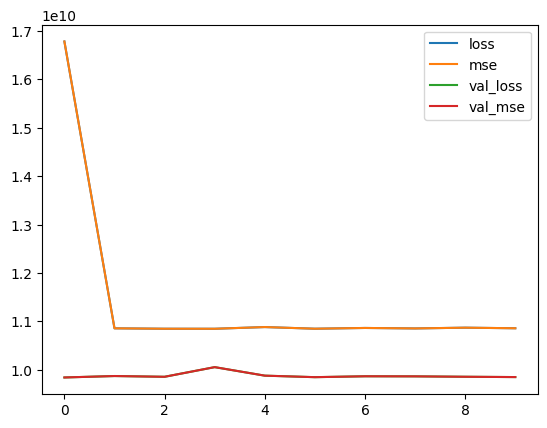

In [29]:
pd.DataFrame(history.history).plot()
plt.show()